In [88]:
#importing libraries 

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import random 
from random import shuffle
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [89]:
#reading the dataset of cow sensor-data

df = pd.read_excel('C:\\Users\\Siddhey\\Documents\\Passau_SS_19\\Data_Science_Lab\\cow-data\\DS_Lab_Team_14_Dataset.xlsx')
df.columns

Index(['Difficulty', 'Cow Number', 'Stomach Activity', 'Stomach Temp.',
       'Lactation(no. of births)', 'Rumination avg', 'Lactation Days', 'Rasse',
       'Braunvieh', 'Fleckvieh', 'Rotbunt', 'Twin Calves', 'THI'],
      dtype='object')

In [90]:
df.head()

,Difficulty,Cow Number,Stomach Activity,Stomach Temp.,Lactation(no. of births),Rumination avg,Lactation Days,Rasse,Braunvieh,Fleckvieh,Rotbunt,Twin Calves,THI
0,0,4,13.16,39.27,2,37.692763,368,Fleckvieh,0,1,0,0,64.344576
1,0,986,13.00,39.66,2,37.692763,363,Fleckvieh,0,1,0,0,64.658517
2,0,58,12.30,39.45,1,37.692763,403,Fleckvieh,0,1,0,0,64.202660
3,0,915,7.13,39.53,3,37.692763,374,Braunvieh,1,0,0,0,64.774311
4,0,784,9.85,39.23,5,37.692763,345,Fleckvieh,0,1,0,0,67.387098


In [91]:
#cow number not a feature

df2=df.drop(['Cow Number'], axis=1)

In [92]:
#extracted feature

features = {'Stomach Activity': df2['Stomach Activity'], 'Stomach Temp.': df2['Stomach Temp.'], 'Lactation_No._of_Births': df2['Lactation(no. of births)'], 'Rumination Average': df2['Rumination avg'], 'Lactation Days': df2['Lactation Days'],'Twin Calves': df2['Twin Calves'],'THI': df2['THI']}

In [93]:
#setting difficulty level of calving as target

target = {'Difficulty Level': df2['Difficulty']}


In [94]:
inputdata = pd.DataFrame(data = features)
inputdata.columns

Index(['Stomach Activity', 'Stomach Temp.', 'Lactation_No._of_Births',
       'Rumination Average', 'Lactation Days', 'Twin Calves', 'THI'],
      dtype='object')

In [95]:
outputdata = pd.DataFrame(data = target)
outputdata.shape

(32, 1)

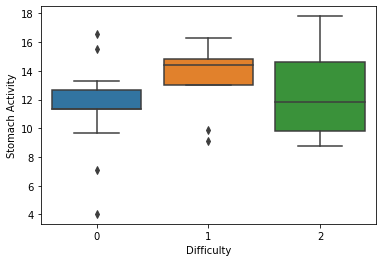

In [96]:
#boxplot for Stomach Activity vs Difficulty Level

sns.boxplot(x='Difficulty',y='Stomach Activity',data=df)

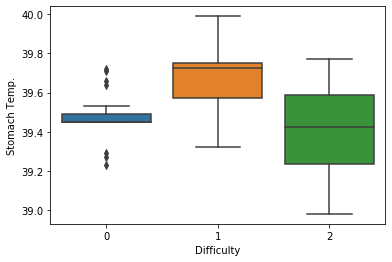

In [97]:
#boxplot for Stomach Temperature vs Difficulty Level

sns.boxplot(x='Difficulty',y='Stomach Temp.',data=df)

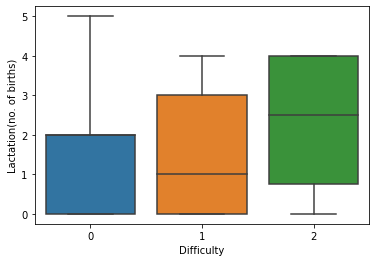

In [98]:
#boxplot for Lactation(no. of prior births) vs Difficulty Level

sns.boxplot(x='Difficulty',y='Lactation(no. of births)',data=df)

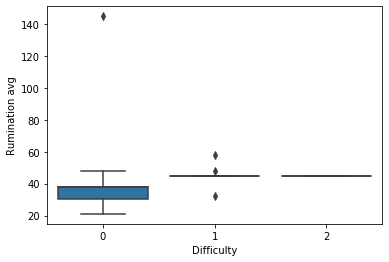

In [99]:
#boxplot for Rumination Average vs Difficulty Level

sns.boxplot(x='Difficulty',y='Rumination avg',data=df)

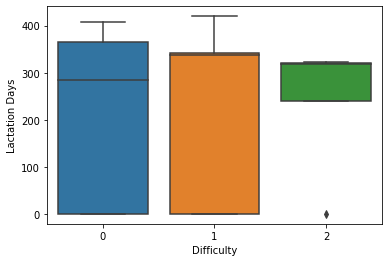

In [100]:
#boxplot for Lactation Days vs Difficulty Level

sns.boxplot(x='Difficulty',y='Lactation Days',data=df)

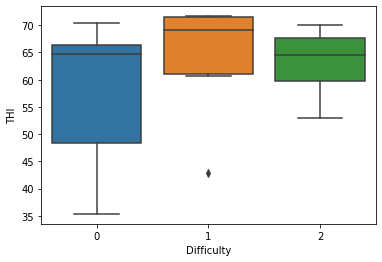

In [102]:
#boxplot for Environment Temperature Humidity vs Difficulty Level

sns.boxplot(x='Difficulty',y='THI',data=df)

In [103]:
inputdata.shape

(32, 7)

In [104]:
#pca preprocessing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputdata)
scaled_data = scaler.transform(inputdata)

In [105]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [106]:
x_pca = pca.transform(scaled_data)
x_pca

array([[-0.82673644, -0.67699352],
       [-0.85254735,  0.48024843],
       [-0.57557184, -0.25379906],
       [-1.13452566, -1.43625729],
       [-1.90016836, -1.85151917],
       [ 0.90208691,  1.2334367 ],
       [ 0.9582136 ,  1.49033542],
       [-1.85975823, -1.14824537],
       [-0.52356675,  0.25090216],
       [ 1.0411253 ,  0.2280415 ],
       [ 1.41455794,  0.61330693],
       [-0.94504033,  1.24789561],
       [ 1.28261386,  2.35084814],
       [-2.66801191,  2.98225546],
       [-1.10233071, -1.75591212],
       [ 1.84754079, -1.97509506],
       [-1.24254777,  1.51189225],
       [ 4.17911152,  0.06003207],
       [-1.36129921, -1.61962295],
       [ 2.02670121, -0.33455452],
       [-0.85795873, -0.454969  ],
       [ 0.97903225, -0.7899006 ],
       [-0.74240293, -0.50594699],
       [ 1.13542969, -1.91410019],
       [ 0.07532589, -0.7802283 ],
       [ 1.79759612, -0.37495739],
       [ 1.13244721, -0.82982835],
       [-1.67734631, -0.7759479 ],
       [-1.56228269,

In [107]:
x_pca.shape

(32, 2)

Text(0, 0.5, 'Second Principal Component')

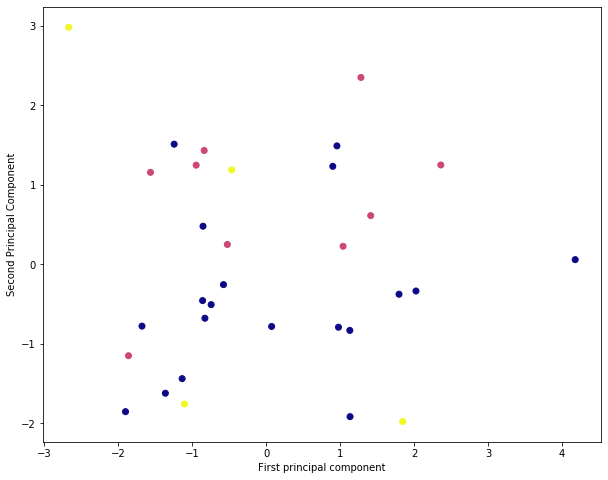

In [108]:
#plotting of two Principle Components

plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df2['Difficulty'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [109]:
#defining x and y as input output variables

y=df['Difficulty']
x0=df.drop(['Cow Number'], axis=1)
x1=x0.drop(['Rasse'], axis=1)
X=x1.drop(['Difficulty'], axis=1)

In [110]:
#stratified k-fold splitting

skf = StratifiedKFold(n_splits=15,shuffle=True, random_state=4)
skf.get_n_splits(df)

15

In [111]:
#user defined function for calculating score

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [112]:
#model implementation

X_train = {}
Y_train = {}

scores_lr = []
scores_svc = []
scores_rforest = []
scores_xgb = []
scores_knn = []
scores_nb = []
scores_tree = []
scores_percep = []

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

for train_index, test_index in skf.split(X, y):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        
        #1
        lr=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
        print('LogisticReg = ',  lr.score(X_test,y_test))
        
        
        #2
        svc=SVC().fit(X_train, y_train)
        print('SVC = ', svc.score(X_test,y_test))
        
        #3
        xgb=XGBClassifier().fit(X_train, y_train)
        print('XGB = ', xgb.score(X_test,y_test))
        
        #4
        knn=KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
        print('KNN = ', knn.score(X_test,y_test))
        
        #5
        nb=GaussianNB().fit(X_train, y_train)
        print('Gaussian = ', nb.score(X_test,y_test))
        
        #6
        tree=DecisionTreeClassifier().fit(X_train, y_train)
        print('Decision Tree = ', tree.score(X_test,y_test))
        
        #7
        rforest=RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
        print('Random Forest = ', rforest.score(X_test,y_test))
        
        #8
        percep=Perceptron().fit(X_train, y_train)
        print('Perceptron = ', percep.score(X_test,y_test))
        
        scores_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))  
        scores_svc.append(get_score(SVC(), X_train, X_test, y_train, y_test))
        scores_rforest.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
        scores_xgb.append(get_score(XGBClassifier(), X_train, X_test, y_train, y_test))
        scores_knn.append(get_score(KNeighborsClassifier(n_neighbors = 3), X_train, X_test, y_train, y_test))
        scores_nb.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))
        scores_tree.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
        scores_percep.append(get_score(Perceptron(), X_train, X_test, y_train, y_test))

C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=15.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning

TRAIN: [ 0  1  2  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31] TEST: [3 6]
LogisticReg =  0.5
SVC =  1.0
XGB =  1.0
KNN =  0.5
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  1.0
Perceptron =  1.0
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24
 25 27 29 30 31] TEST: [21 26 28]
LogisticReg =  0.6666666666666666
SVC =  0.6666666666666666
XGB =  0.6666666666666666
KNN =  0.6666666666666666
Gaussian =  0.6666666666666666
Decision Tree =  0.6666666666666666
Random Forest =  0.6666666666666666
Perceptron =  0.6666666666666666
TRAIN: [ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31] TEST: [0 4]
LogisticReg =  0.5


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

SVC =  1.0
XGB =  1.0
KNN =  0.5
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  1.0
Perceptron =  1.0
TRAIN: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 23 24 26
 27 28 29 30 31] TEST: [ 9 22 25]


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

LogisticReg =  0.6666666666666666
SVC =  0.6666666666666666
XGB =  0.6666666666666666
KNN =  0.6666666666666666
Gaussian =  0.6666666666666666
Decision Tree =  0.6666666666666666
Random Forest =  0.6666666666666666
Perceptron =  0.3333333333333333
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24
 25 26 27 28 29 30 31] TEST: [20]


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

LogisticReg =  1.0
SVC =  1.0
XGB =  1.0
KNN =  0.0
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  1.0
Perceptron =  1.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 28 29 30 31] TEST: [27]
LogisticReg =  1.0
SVC =  1.0
XGB =  1.0
KNN =  1.0
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  1.0
Perceptron =  1.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28 29 30] TEST: [ 8 19 31]
LogisticReg =  0.3333333333333333
SVC =  0.3333333333333333
XGB =  0.3333333333333333
KNN =  1.0
Gaussian =  1.0
Decision Tree =  0.3333333333333333
Random Forest =  0.6666666666666666
Perceptron =  0.3333333333333333


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24
 25 26 27 28 29 31] TEST: [18 30]
LogisticReg =  0.5
SVC =  0.5
XGB =  0.5
KNN =  0.5
Gaussian =  0.5
Decision Tree =  0.5
Random Forest =  1.0
Perceptron =  0.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  3  4  5  6  7  8  9 10 11 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31] TEST: [ 2 12 13]
LogisticReg =  0.6666666666666666
SVC =  0.6666666666666666
XGB =  0.6666666666666666
KNN =  1.0
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  0.6666666666666666
Perceptron =  0.3333333333333333


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 25 26 27 28 30 31] TEST: [24 29]
LogisticReg =  0.5
SVC =  0.5
XGB =  1.0
KNN =  1.0
Gaussian =  0.5
Decision Tree =  0.5
Random Forest =  1.0
Perceptron =  0.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 15 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31] TEST: [ 7 16]
LogisticReg =  0.0
SVC =  0.5
XGB =  0.0
KNN =  0.5
Gaussian =  0.5
Decision Tree =  1.0
Random Forest =  0.5
Perceptron =  0.5


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 11 12 13 14 16 18 19 20 21 22 23 24 25 26
 27 28 29 30 31] TEST: [10 15 17]
LogisticReg =  0.3333333333333333
SVC =  0.6666666666666666
XGB =  0.3333333333333333
KNN =  0.3333333333333333
Gaussian =  0.0
Decision Tree =  1.0
Random Forest =  0.3333333333333333
Perceptron =  0.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  2  3  4  5  6  7  8  9 10 12 13 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31] TEST: [ 1 11 14]
LogisticReg =  0.3333333333333333
SVC =  0.3333333333333333
XGB =  1.0
KNN =  1.0
Gaussian =  0.6666666666666666
Decision Tree =  1.0
Random Forest =  0.6666666666666666
Perceptron =  0.3333333333333333


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31] TEST: [5]
LogisticReg =  0.0
SVC =  1.0
XGB =  1.0
KNN =  0.0
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  1.0
Perceptron =  0.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Siddhey\Anaconda3\lib\site-

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24
 25 26 27 28 29 30 31] TEST: [23]
LogisticReg =  1.0
SVC =  1.0
XGB =  1.0
KNN =  1.0
Gaussian =  1.0
Decision Tree =  1.0
Random Forest =  1.0
Perceptron =  0.0


C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Siddhey\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [113]:
#printing average scores obtained for the above models trained

print('Average Accuracy Score - Logistic Regression:', np.average(scores_lr))

print('Average Accuracy Score - SVC:', np.average(scores_svc))

print('Average Accuracy Score - XGB:', np.average(scores_xgb))

print('Average Accuracy Score - KNN:', np.average(scores_knn))

print('Average Accuracy Score - GaussianNB:', np.average(scores_nb))

print('Average Accuracy Score - Decision Tree:', np.average(scores_tree))

print('Average Accuracy Score - Random Forest:', np.average(scores_rforest))

print('Average Accuracy Score - Perceptron:', np.average(scores_percep))




Average Accuracy Score - Logistic Regression: 0.5777777777777778
Average Accuracy Score - SVC: 0.7222222222222222
Average Accuracy Score - XGB: 0.7444444444444444
Average Accuracy Score - KNN: 0.6444444444444444
Average Accuracy Score - GaussianNB: 0.7666666666666665
Average Accuracy Score - Decision Tree: 0.8777777777777778
Average Accuracy Score - Random Forest: 0.8666666666666667
Average Accuracy Score - Perceptron: 0.43333333333333335
